###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2018 parts of this notebook are from ([this Jupyter notebook](https://nbviewer.jupyter.org/github/heinerigel/coursera/blob/master/Notebooks4Coursera/W2/W2_P1.ipynb)) by Heiner Igel ([@heinerigel](https://github.com/heinerigel)) which is a supplemenatry material to his Coursera lecture [Computers, Waves, Simulations: A Practical Introduction to Numerical Methods using Python](https://www.coursera.org/learn/computers-waves-simulations),  additional modifications by D. Koehn, notebook style sheet by L.A. Barba, N.C. Clementi

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())

# What is an "optimum" grid point distance?

After the introduction to the finite-difference method in the last class, you might think: how do I choose the "optimum" spatial or temporal grid point distance $dx$ or $dt$ for a given FD-scheme in order to find the sweet spot between numerical accuracy of the solution and computation time? To achieve this goal, I introduce the concept of "gridpoints 
per wavelength" and demonstrate the accuracy for an under- and oversampled computation of the first derivative of the sine function.

In [2]:
# Import Libraries
import numpy as np
from math import *
import matplotlib.pyplot as plt

We initialize a space-dependent sine function

\begin{equation}
f(x)= \sin (k x) \notag
\end{equation}

where the wavenumber k is

\begin{equation}
k = \dfrac{2 \pi}{\lambda} \notag
\end{equation}

and $\lambda$ is wavelength.

In [3]:
# Initial parameters
xmax = 10.0                     # maximum extension of physical domain (m)
nx = 200                        # number of gridpoints    
dx = xmax/(nx-1)                # grid increment dx (m)
x  = np.linspace(0,xmax,nx)     # space coordinates

# Initialization of sine function
l = 20*dx        # wavelength
k = 2*pi/l       # wavenumber
f = np.sin(k*x)

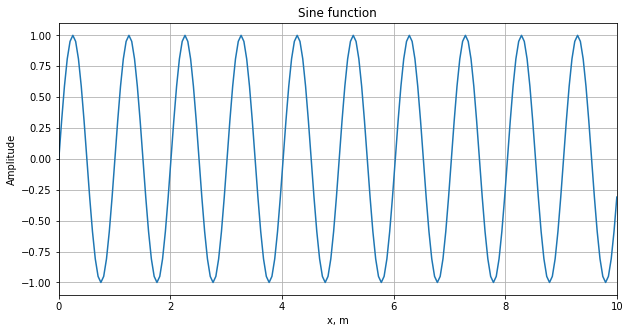

In [4]:
# Define figure size
plt.figure(figsize=(10,5))

# Plot sine function
plt.plot(x, f)
plt.title('Sine function')
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.xlim((0, xmax))
plt.grid()
plt.show()

In the cell below we calculate the central finite-difference derivative of f(x) using two points

\begin{equation} 
f^{\prime}(x)=\dfrac{f(x+dx)-f(x-dx)}{2dx}\notag
\end{equation} 

and  compare with the analytical derivative

\begin{equation} 
f^{\prime}(x) = k \cos(k x)\notag
\end{equation} 

In [5]:
# First derivative with central difference operator

# Initiation of numerical and analytical derivatives 
nder=np.zeros(nx)          # numerical derivative
ader=np.zeros(nx)          # analytical derivative

# Numerical derivative of the given function
for i in range (1, nx-1):
    nder[i]=(f[i+1]-f[i-1])/(2*dx)

# Analytical derivative of the given function
ader= k * np.cos(k*x)

# Exclude boundaries
ader[0]=0.
ader[nx-1]=0.

# Error (rms) 
rms = np.sqrt(np.mean(nder-ader)**2)

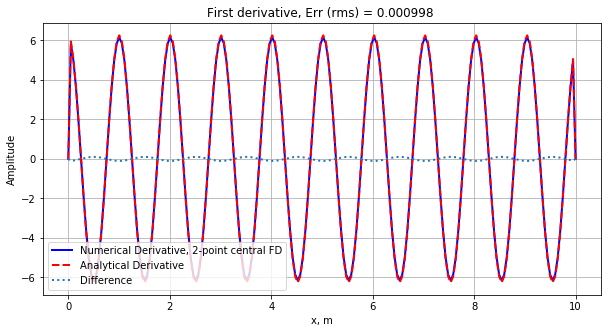

In [6]:
# Define figure size
plt.figure(figsize=(10,5))

# Plotting numerical & analytical solution and their difference
plt.plot (x, nder,label="Numerical Derivative, 2-point central FD", lw=2, ls='-', color="blue")
plt.plot (x, ader, label="Analytical Derivative", lw=2, ls="--",color="red")
plt.plot (x, nder-ader, label="Difference", lw=2, ls=":")
plt.title("First derivative, Err (rms) = %.6f " % (rms) )
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.legend(loc='lower left')
plt.grid()
plt.show()

### The concept of number of points per wavelength

\begin{equation}
n_\lambda = \dfrac{\lambda}{dx} \notag
\end{equation}

How does the error of the numerical derivative change with the number of points per wavelength?

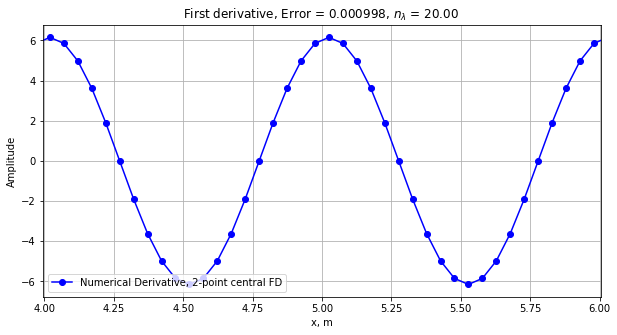

In [7]:
# Define figure size
plt.figure(figsize=(10,5))

# Plotting number of points per wavelength
# ----------------------------------------
plt.plot (x, nder,label="Numerical Derivative, 2-point central FD", marker='o', color="blue")
plt.title("First derivative, Error = %.6f, $n_\lambda$ = %.2f " % ( rms, l/dx) )
plt.xlabel('x, m')
plt.ylabel('Amplitude')
plt.legend(loc='lower left')
plt.xlim((xmax/2-l,xmax/2+l))
plt.grid()
plt.show()

### Investigate the error as a function of grid points per wavelength

Next, we investigate how the error of the FD solution changes as a function of grid points per wavelength

In [8]:
# Define a range of number of points per wavelength, e.g. [nmin=3,5,6 ... ,nmax=15]
# Loop over points, calculate corresponding wavelength and calculate error

# Initialize vectors
nmin=1
nmax=15
na =  np.zeros(nmax-nmin+1)    # Vector with number of points per wavelength
err = np.zeros(nmax-nmin+1)    # Vector with error

j = -1  # array index

# Loop through finite-difference derivative calculation
for n in range (nmin,nmax+1):
    
    j = j+1   # array index
    na[j] = n

    
    # Initialize sin function
    l = na[j]*dx  # wavelength
    k = 2*pi/l    # wavenumber
    f = np.sin(k*x)

    # Numerical derivative of the sin function
    for i in range (1, nx-1):
        nder[i]=(f[i+1]-f[i-1])/(2*dx)

    # Analytical derivative of the sin function
    ader= k * np.cos(k*x)
    
    # Exclude boundaries
    ader[0]=0.
    ader[nx-1]=0.

    i0 = np.int(nx/2)
    
    # Error (rms) 
    err[j] = (nder[i0]-ader[i0])**2/ader[i0]**2 * 100

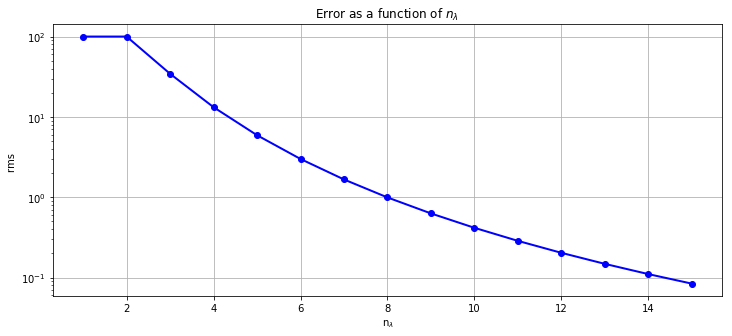

In [9]:
# Define figure size
plt.figure(figsize=(12,5))

# Plotting error as function of number of points per wavelength
# -------------------------------------------------------------
plt.semilogy(na,err, lw=2, ls='-', marker='o', color="blue")
plt.title('Error as a function of $n_\lambda$ ')
plt.xlabel('n$_\lambda$')
plt.ylabel('rms ')
plt.grid()
plt.show()

## We learned

* 2-point finite-difference approximations can provide  estimates of the 1st derivative of a function
* The accuracy depends on the "number of points per wavelength", i.e., how well we sample the original function
* The more points we use the more accurate is the derivative approximation